# 1. k means clustering

###### clustering is the method of segragating data points in groups which have similarity between them

##### types of clustering

###### 1. exclusive clustering => there is no overlap of data between the clusters

###### 2.overlapping clustering => soft cluster means the same data may belong to two cluster at the same time eg fuzzy / c-means clustering

###### 3. hierarichal clustering => eg . cluster A an B are created and C cluster is created which includes both A and B types of cluster and futher keeps happing like this

### k-means clustering is the process of clustering data points in the k different cluster

#### centre of a cluster => centroid is the center of a cluster which is the arithmetic mean of all the points in the plane figure

### how it works -> we initially take 3 random centers then assign all the points to these centers on basis of closness of these points to the cluster
again we define new centroids by taking the mean of the new clusters 
again we as assign all the points to these points 

this is d

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({
    "x":[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    "y":[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

In [3]:
df

x   y
0   12  39
1   20  36
2   28  30
3   18  52
4   29  54
5   33  46
6   24  55
7   45  59
8   45  63
9   52  70
10  51  66
11  52  63
12  55  58
13  53  23
14  55  14
15  61   8
16  64  19
17  69   7
18  72  24

In [4]:
k=3 #number of centers we are expecting

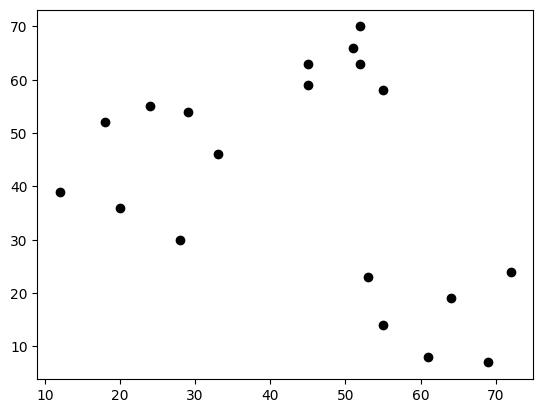

In [6]:
plt.scatter(df["x"],df["y"], color='k')

In [7]:
### for produing the same random numbers
np.random.seed(3)

In [11]:
#Initial centroids we can start by taking any three random elements from the collection of points or any three random point from the points range
centroids = {
    i+1: [np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}

In [12]:
centroids

{1: [27, 14], 2: [24, 74], 3: [19, 74]}

(0.0, 80.0)

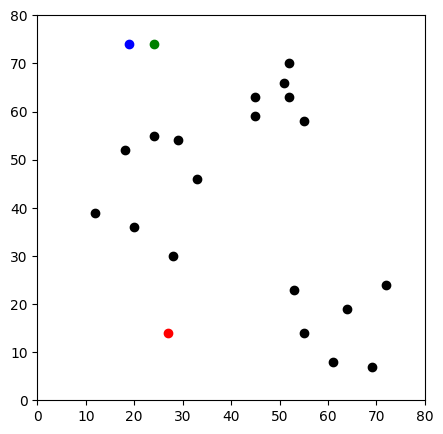

In [13]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colormap = {1:'r',2:'g',3:'b'}
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color=colormap[i])
plt.xlim(0,80)
plt.ylim(0,80)

## assigning points to the various cluster according to their distance frmo the centroid

In [17]:

#assigning
def assignment(df,centroids):
    #creating three columns in the df where each column show distance from the centroid
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (np.sqrt((df['x']-centroids[i][0])**2 +(df['y']-centroids[i][1])**2))
    #getting names of all the distance columns
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    # print(centroids_distance_cols)
    #loc function is saying take all the rows of three columns of centroids_distance_cols
    # print(df.loc[:,centroids_distance_cols])
    # -> : it is saying to select all the rows and centroids_distance_cols it is saying to select only these columns
    #after selecting all the three column we are selecting the column name which has minimum index(row) value using the idxmin func
    df["closest"] = df.loc[:,centroids_distance_cols].idxmin(axis=1)
    print(df["closest"])
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from')))
    print(df["closest"])
    df["color"] = df["closest"].map(lambda x: colormap[x])
    return df



In [22]:
centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
#this loc parameter has two part row and column , first part is row and second part is column, we are saying select all the rows and only three columns which are given in the list
df.loc[:,centroids_distance_cols]

distance_from_1  distance_from_2  distance_from_3
0         29.154759        37.000000        35.693137
1         23.086793        38.209946        38.013156
2         16.031220        44.181444        44.911023
3         39.051248        22.803509        22.022716
4         40.049969        20.615528        22.360680
5         32.557641        29.410882        31.304952
6         41.109610        19.000000        19.646883
7         48.466483        25.806976        30.016662
8         52.201533        23.706539        28.231188
9         61.326992        28.284271        33.241540
10        57.271284        28.160256        32.984845
11        55.009090        30.083218        34.785054
12        52.153619        34.885527        39.395431
13        27.513633        58.668561        61.294372
14        28.000000        67.535176        69.971423
15        34.525353        75.663730        78.230429
16        37.336309        68.007353        71.063352
17        42.579338        80.709355        83.600239
18        46.097722        69.310894        72.862885

In [23]:
df = assignment(df,centroids)
print(df.head())

0     distance_from_1
1     distance_from_1
2     distance_from_1
3     distance_from_3
4     distance_from_2
5     distance_from_2
6     distance_from_2
7     distance_from_2
8     distance_from_2
9     distance_from_2
10    distance_from_2
11    distance_from_2
12    distance_from_2
13    distance_from_1
14    distance_from_1
15    distance_from_1
16    distance_from_1
17    distance_from_1
18    distance_from_1
Name: closest, dtype: object
0     1
1     1
2     1
3     3
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    1
14    1
15    1
16    1
17    1
18    1
Name: closest, dtype: int64
    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        29.154759        37.000000        35.693137        1     r
1  20  36        23.086793        38.209946        38.013156        1     r
2  28  30        16.031220        44.181444        44.911023        1     r
3  18  52        39.051248        22.803509        22.022716        3

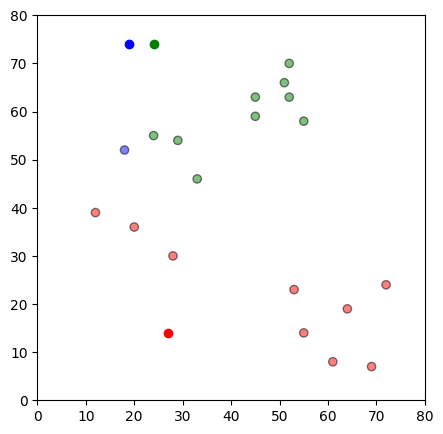

In [24]:
fig = plt.figure(figsize= (5,5))
plt.scatter(df['x'],df['y'],color = df['color'], alpha= 0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color=colormap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

{1: [55.0, 16.833333333333332], 2: [45.8, 55.8], 3: [16.666666666666668, 42.333333333333336]}


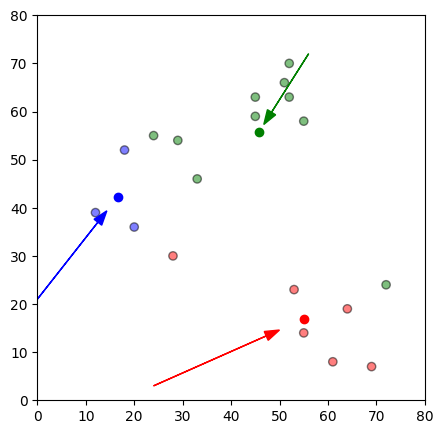

In [17]:
#updating the centroid
import copy
#using deep copy to keep the older values
old_centroids = copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==i]['y'])
    return k
centroids = update(centroids)
print(centroids)
fig = plt.figure(figsize= (5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'],color = df['color'], alpha= 0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colormap[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0]-old_centroids[i][0])*0.75
    dy = (centroids[i][1]-old_centroids[i][1])*0.75
    ax.arrow(old_x, old_y,dx, dy,head_width =2 , head_length =3, fc= colormap[i], ec= colormap[i])
plt.show()

0     distance_from_3
1     distance_from_3
2     distance_from_3
3     distance_from_3
4     distance_from_2
5     distance_from_2
6     distance_from_3
7     distance_from_2
8     distance_from_2
9     distance_from_2
10    distance_from_2
11    distance_from_2
12    distance_from_2
13    distance_from_1
14    distance_from_1
15    distance_from_1
16    distance_from_1
17    distance_from_1
18    distance_from_1
Name: closest, dtype: object
0     3
1     3
2     3
3     3
4     2
5     2
6     3
7     2
8     2
9     2
10    2
11    2
12    2
13    1
14    1
15    1
16    1
17    1
18    1
Name: closest, dtype: int64


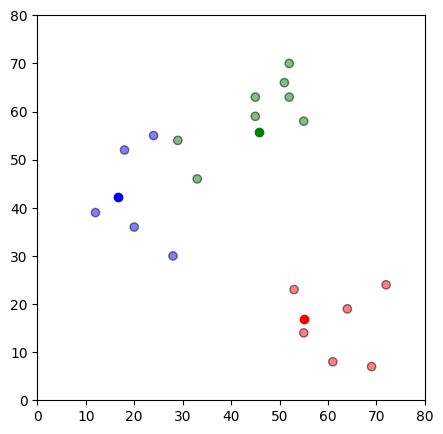

In [18]:
df = assignment(df,centroids)
fig = plt.figure(figsize= (5,5))
plt.scatter(df['x'],df['y'],color = df['color'], alpha= 0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colormap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

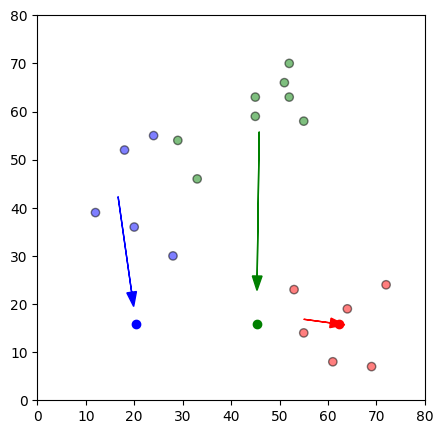

In [19]:
#updating the centroid
import copy
#using deep copy to keep the older values
old_centroids = copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==1]['y'])
    return k
centroids = update(centroids)

fig = plt.figure(figsize= (5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'],color = df['color'], alpha= 0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colormap[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0]-old_centroids[i][0])*0.75
    dy = (centroids[i][1]-old_centroids[i][1])*0.75
    ax.arrow(old_x, old_y,dx, dy,head_width =2 , head_length =3, fc= colormap[i], ec= colormap[i])
plt.show()

0     distance_from_3
1     distance_from_3
2     distance_from_3
3     distance_from_3
4     distance_from_3
5     distance_from_2
6     distance_from_3
7     distance_from_2
8     distance_from_2
9     distance_from_2
10    distance_from_2
11    distance_from_2
12    distance_from_1
13    distance_from_2
14    distance_from_1
15    distance_from_1
16    distance_from_1
17    distance_from_1
18    distance_from_1
Name: closest, dtype: object
0     3
1     3
2     3
3     3
4     3
5     2
6     3
7     2
8     2
9     2
10    2
11    2
12    1
13    2
14    1
15    1
16    1
17    1
18    1
Name: closest, dtype: int64


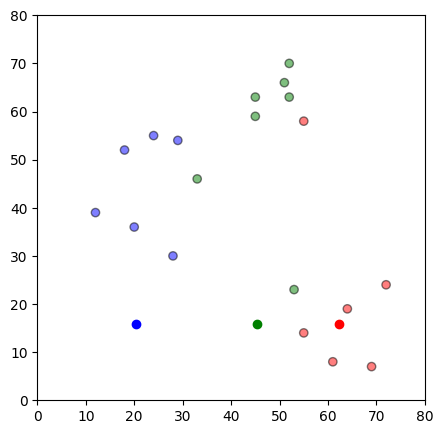

In [20]:
df = assignment(df,centroids)
fig = plt.figure(figsize= (5,5))
plt.scatter(df['x'],df['y'],color = df['color'], alpha= 0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colormap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

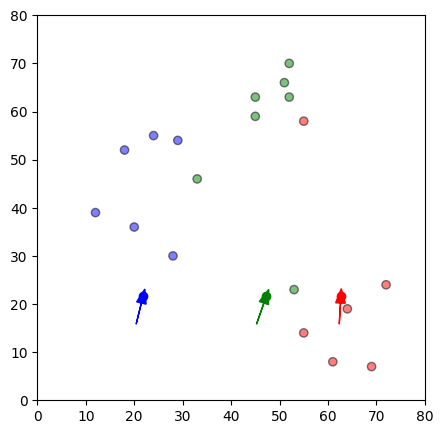

In [21]:
#updating the centroid
import copy
#using deep copy to keep the older values
old_centroids = copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==1]['y'])
    return k
centroids = update(centroids)

fig = plt.figure(figsize= (5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'],color = df['color'], alpha= 0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colormap[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0]-old_centroids[i][0])*0.75
    dy = (centroids[i][1]-old_centroids[i][1])*0.75
    ax.arrow(old_x, old_y,dx, dy,head_width =2 , head_length =3, fc= colormap[i], ec= colormap[i])
plt.show()

# 2. LINEAR REGRESSION

###  it is a supervised learning algorithm .


### supervised learning has two types:
    classification 
    regression

### classification
we know 

### regression :  
It predicts the continuous output variables based on the independent input variable. like the prediction of house prices based on different parameters like house age, distance from the main road, location, area, etc.

### linear regression
a simple linear function of drawing a straight line of form y = w1x1 + w2x2 + constant

### types of linear regression
1.simple linear regression -> it involves only one dependent variable 
2. multiple linear regression -> int involves more than one dependant variables

### best fit line -> drawing a line of linear fashion which has least distance from the data points and which can predict the dependant variable best

### y^ = constant + w1x    #simple linear regression equation                   

#### y^ is the predicted value and y is the actual value 

##### the idea is to get the best fit line, to do it we have to update the values of constants to most optimal values . while models tries to learn we try to update these constants values to the most optimal values


##### bias is the constant without the independant variable part, weights are the constanst with the independant variable part

### cost function or loss function
The cost function or the loss function is nothing but the error or difference between the predicted value  Y^ and the true value Y.

#### in linear regression we use the mean squared error (MSE) cost function which is the average of squared error
there are many regression cost functions like mean error(ME) , mean squared error(MSE) , mean absolute error(MAE) but here we will be using MSE

##### const function = 1/n* (summation of all n points (y^-y)^2)

##### this cost function is used to do GRADIENT DESCENT , this ensures that the value of MSE converges to the global minima 

### GRADIENT DESCENT
the idea is to use update the constants(gradients) by intially beginning from random values of c1 and w1 .

in the below code we are checking the change in loss function with respect to change in constants theta1 

##### here our equation is supposed to look like y^ = theta2*(Xi) + theta1

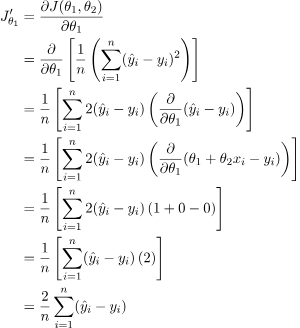

### similarly we see the change in loss function with respect to theta2

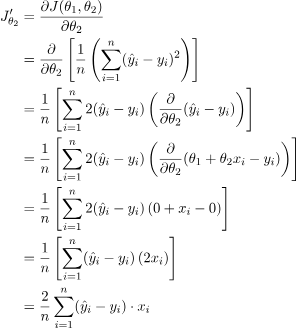

### we want to move in the negative direction of cost , that is moving in direction of MSE negative gradient


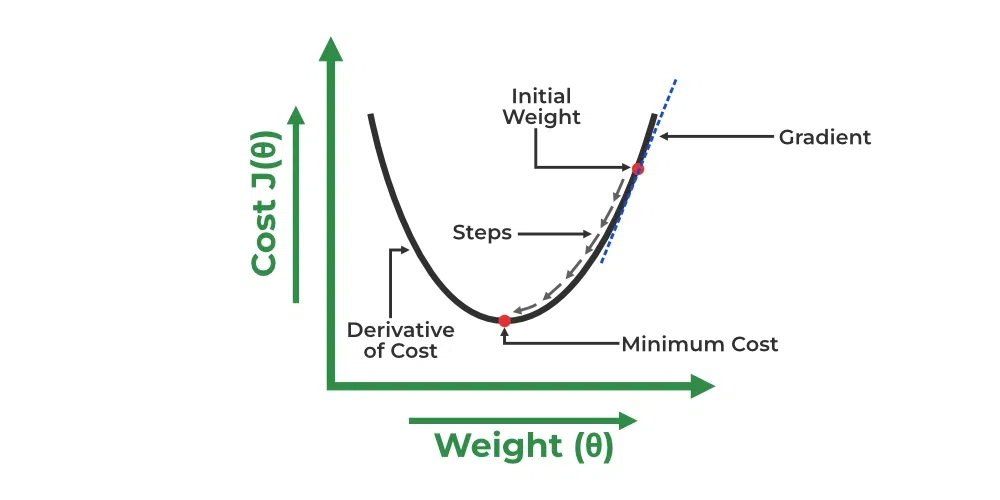

#### adjusting the weight in that direction

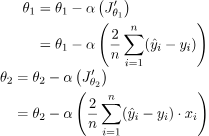

#####  in the above image we are seeing we have calculated the change in the theta value on basis of change in the value of MSE , we are updating the thetha by going in the negative direction .
here alpha is the learning rate

## let's implement the linear regression function

In [25]:
import pandas as pd
import numpy as np

In [26]:
url = "https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv"
data = pd.read_csv(url)

In [27]:
data.head()

x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

In [28]:
data.dropna()  #not a good practice since we will loss some data and hence some better methods of replacment and all need to be tried but it's fine for now but here we are trying it

x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[699 rows x 2 columns]

In [29]:
data.shape

(700, 2)

In [10]:
#creating the training and testing data

#creating with 500 rows and one columns
train_input = np.array(data["x"][0:500]).reshape(500,1)
train_output = np.array(data["y"][0:500]).reshape(500,1)
#validation sets
test_input = np.array(data["x"][500:700]).reshape(200,1)
test_output = np.array(data["y"][500:700]).reshape(200,1)

#### forward propogation  -> in this we calculate the predicted values my applying y = mx + c with intially started with random values of m and c

##### process -->
    1. do forward propogration
    2. calculate the cost function values i.e MSE
    3. update the values of constansts

In [14]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [15]:
class LinearRegression:
	def __init__(self):
		self.parameters = {}

	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions

	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost

	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
        #here we have * -1 , since we wan't to change the values in the negative direction of increase of slope
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives

	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - \
			learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - \
			learning_rate * derivatives['dc']

	def train(self, train_input, train_output, learning_rate, iters):
		# Initialize random parameters
		self.parameters['m'] = np.random.uniform(0, 1) * -1
		self.parameters['c'] = np.random.uniform(0, 1) * -1

		# Initialize loss
		self.loss = []

		# Initialize figure and axis for animation
		fig, ax = plt.subplots()
		x_vals = np.linspace(min(train_input), max(train_input), 100)
		line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
						self.parameters['c'], color='red', label='Regression Line')
		ax.scatter(train_input, train_output, marker='o',
				color='green', label='Training Data')

		# Set y-axis limits to exclude negative values
		ax.set_ylim(0, max(train_output) + 1)

		def update(frame):
			# Forward propagation
			predictions = self.forward_propagation(train_input)

			# Cost function
			cost = self.cost_function(predictions, train_output)

			# Back propagation
			derivatives = self.backward_propagation(
				train_input, train_output, predictions)

			# Update parameters
			self.update_parameters(derivatives, learning_rate)

			# Update the regression line
			line.set_ydata(self.parameters['m']
						* x_vals + self.parameters['c'])

			# Append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(frame + 1, cost))

			return line,
		# Create animation
		ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

		# Save the animation as a video file (e.g., MP4)
		#ani.save('linear_regression_A.mp4', writer='ffmpeg')

		plt.xlabel('Input')
		plt.ylabel('Output')
		plt.title('Linear Regression')
		plt.legend()
		plt.show()

		return self.parameters, self.loss


Iteration = 1, Loss = nan
Iteration = 1, Loss = nan


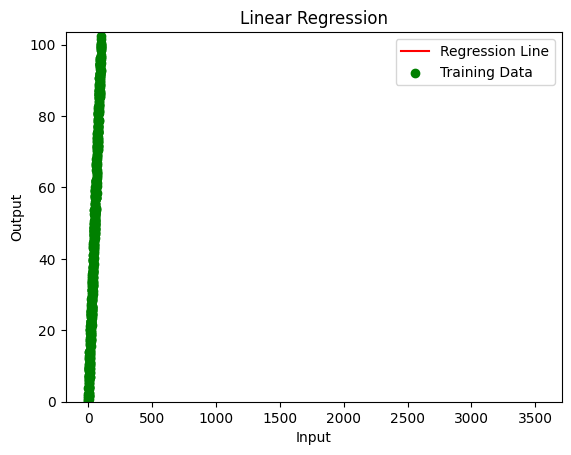

In [16]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

# 3. LOGISTIC REGRESSION

### this is classification type of machine learning algorithm which convert a given value between the range of 0 and 1

it uses sigmoid function or logit function which is 1/1+e^-x
it converts a  linear regression value into a range of 0 and 1

#####  when to use logistic regression
the data must be linearly separable othewise the result won't be good .
linearly separable means we can separate the data in two group by drawing a line
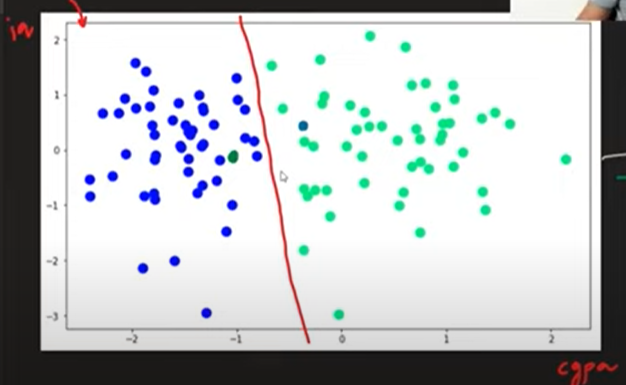

#### maths concept and understanding logistic regression
equation of line used -> Ax + By + = 0 or in more general form Ax1 + Bx2 + c = 0 which can be scaled to higher dimension by increasing x terms


how to draw this line -> perceptron trick
PERCEPTRON TRICK -> it says that initially we will take random values of A, B and C and draw a random line then we will ask each point if the line is at correct position or not while training . the line will say yes or no and on that basis we will try changing the position of line.
We will perform the above thing for 1000 times or till convergence (till the time no of missclassified point is zero)
for classifying the point position we will fit the point in the equation and find if Ax1+ BX2 + C > 0 or < 0 or = 0 basic geometry

the position of the line can be changed by changing the value of A, B , C

how we will change perceptron trick says ->
let's suppose the equation of line is 2x+3y+5 = 0
in the below image -> P(4,5) is misclassified and P(1,3) as well. 
perceptron says that add 1 as third coordinate in points P(4,5,1). 
so the new eqution of line as per changes according to point P(4,5) will become -> (2,3,5) - (4,5,1) = -2 , -2 , 4 hence the equation of line will become -> -2X + -2Y + 4 = 0. in our example since the green points are in positive direction of line and blue are supposed to be in negative direction of line .  and therefore when we want to move the line according to blue points then we do - or subtraction as in above case and when we want to rotate according the green points then we do addition (2 3 5) + (1 3 1) = > 3 , 6 , 6 and hence the equation will become -> 3x + 6y + 6 = 0


this subtractiona or addition of points that we are doing is done in proporton of learning rate -> and hence for ex. the equation after substraction will become -> suppose learning rate (alpha) is  0.1 
(2,3,5) - 0.1(4,5,1) = 1.4x + 2.5y + 4.9 = 0  similary for all points


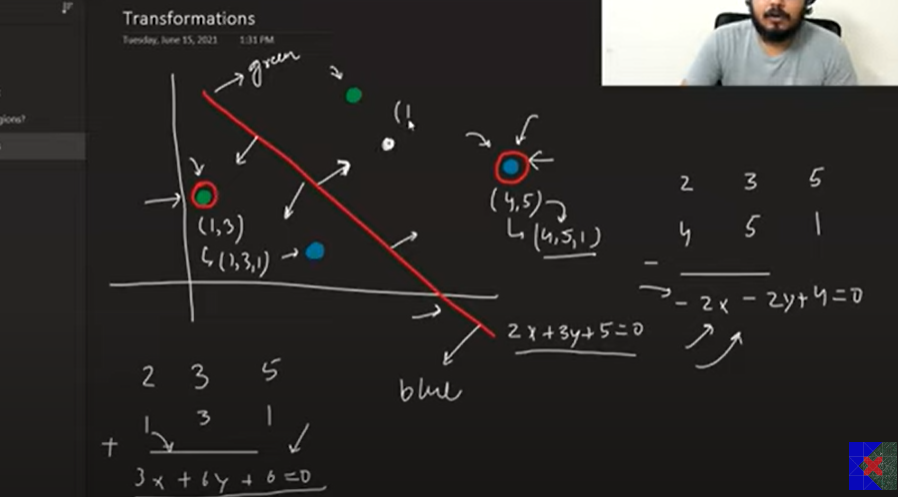


##### writing equation in simpler form
equation of a line w1x1 + w2x2 + w0 = 0
let's suppose x0 value is one by adding a extra column in input where we suppose that x1 value will always be 1 
hence our equation can become -> w0x1 + w1x1 + w2x2 = 0  which can be further written as Σ (sigma ranges from 1 to 2) wixi = 0

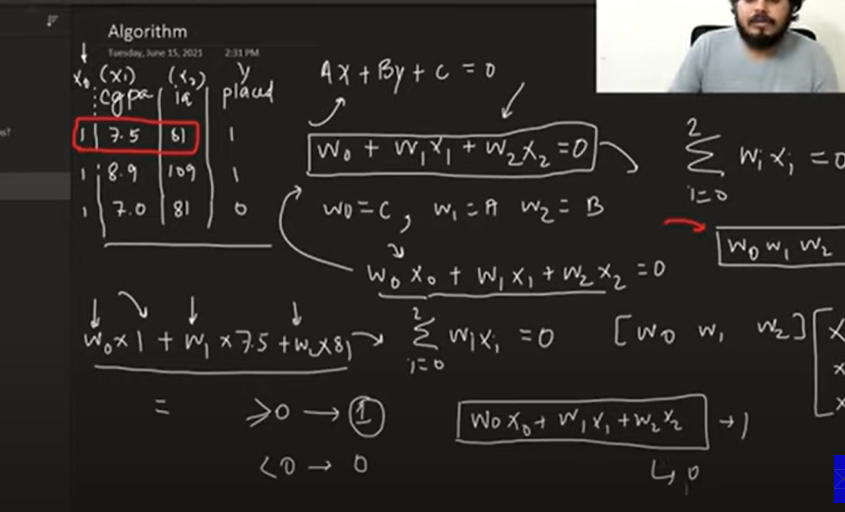


##### writing algorithm for PERCEPTRON TRICK further ->
epoch -> 1000 , η(eta) learning rate_> 0.01 
for i in range(epoch):
    randomly select a point 
    if point is a negative point but we find Σ (sigma ranges from 1 to 2) wixi > 0 basically it is saying a negative point is placed in the positive side of line hence we will have to adjust the point such that the poin comes in the nagtive side of the line.
    hence we will update the w matrix 
        Wnew = Wold - ηXi (x vector is the point equation where x0  is fixed 1)
    if Xi is a positive point and  Σ (sigma ranges from 1 to 2) wixi < 0:
        Wnew = Wold + ηXi (x vector is the point equation where x0  is fixed 1)

this above equation fo checking two if else can be reduced to one . 
y^ represented predicted value i.e the line is saying that the point is lying in the it's positive or negtive region->
we can see in the below image -> how the equation is reduced to one -> y is the value that is the truth value where point lies
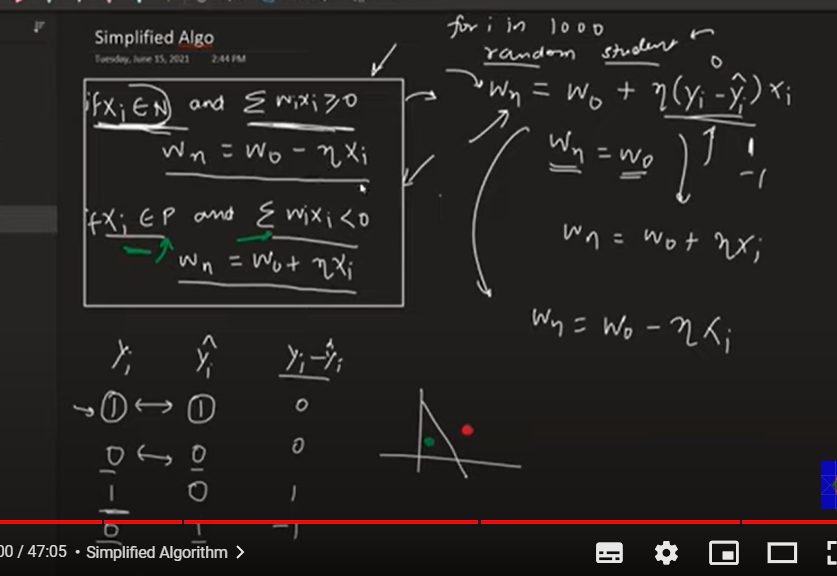
    

#### various kind of logistic regrssion are 
1. binomial logistic regression -> only two categories
2. multinomial logistic regression -> more than two categories here we use softmax which is a variation of sigmoid function
3. oridinal which give depenedent reponses like low , medium , high
   

#### we use linear regression to find the value and then we convert that in range of 0 and 1

### code 

In [3]:
import sklearn as sk
import pandas as pd

In [31]:
data = pd.read_csv("HR_comma_sep.csv")

In [32]:

data.dropna()
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [33]:
#plottng satisfication_level and left retained
import matplotlib.pyplot as plt

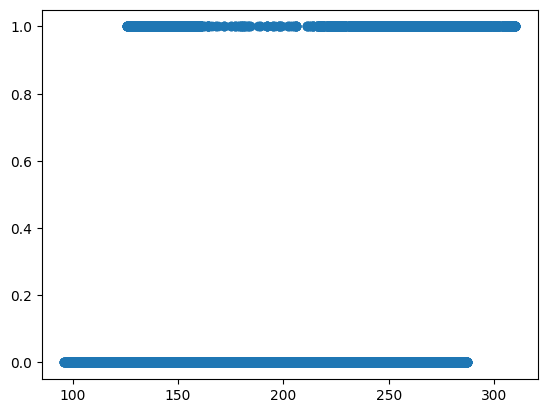

In [34]:
plt.scatter(data["average_montly_hours"],data["left"])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,Y_train, Y_test = train_test_split(data["satisfaction_level"],data["left"],test_size=.1)

In [37]:
X_train.count()
X_test.shape

(1500,)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [42]:
import numpy as np

In [43]:
x_train = np.array(X_train).reshape(-1,1)

x_train.shape, X_train.head()

((13499, 1),
 11725    0.16
 8141     0.61
 9738     0.85
 6418     0.98
 14975    0.10
 Name: satisfaction_level, dtype: float64)

In [44]:
model.fit(x_train,Y_train)

LogisticRegression()

In [45]:
x_test = np.array(X_test).reshape(-1,1)

In [46]:
print(model.predict(x_test)[0:10])
print(Y_test[0:10])

[0 0 0 0 0 0 1 0 0 0]
5543     0
11216    0
603      1
14009    0
3118     0
2992     0
10364    0
13375    0
7548     0
14986    1
Name: left, dtype: int64


In [47]:
model.score(x_test, Y_test)

0.7646666666666667

In [25]:
model.predict_proba(x_test)[0:10]

array([[0.92389454, 0.07610546],
       [0.88505071, 0.11494929],
       [0.8190527 , 0.1809473 ],
       [0.86429557, 0.13570443],
       [0.88885491, 0.11114509],
       [0.88113372, 0.11886628],
       [0.68761935, 0.31238065],
       [0.9426773 , 0.0573227 ],
       [0.88885491, 0.11114509],
       [0.85514629, 0.14485371]])

# 4. naive bayes algorithm

#### definition-> naive bayes is the conditional probability we already know about P(Y/X) = (P(X/Y)*P(Y))/PX

#### important point for applying naive bayes algorithm
1. the feature must be indepenedent of each other which is generally not the case in the real world
2. it is very fast
3. types of naive bayes -> gaussian naive bayes, bernoullis naive bayes


### types
1. gaussian -> the continuous feature values need to normally distributed when a feature is plotted it give a bell shaped curve
2. bernaoulli -> used for multinomial classification 

### code 

In [50]:
import numpy as np
import pandas as pd
import sklearn as sk

In [51]:
df = pd.read_csv('Titanic-Dataset.csv')

In [52]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [53]:
df.drop(["Name","Ticket", "Cabin","Embarked"], axis ="columns", inplace=True)

In [54]:
sex_dummies = pd.get_dummies(df.Sex)

In [55]:
df = pd.concat([df, sex_dummies], axis= "columns")

df.drop("Sex", axis= "columns", inplace=True)


In [56]:
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  female   male
0            1         0       3  22.0      1      0   7.2500   False   True
1            2         1       1  38.0      1      0  71.2833    True  False
2            3         1       3  26.0      0      0   7.9250    True  False
3            4         1       1  35.0      1      0  53.1000    True  False
4            5         0       3  35.0      0      0   8.0500   False   True

In [57]:
output = df.Survived

In [58]:
input = df.drop("Survived", axis="columns")

In [59]:
input.head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  female   male
0            1       3  22.0      1      0   7.2500   False   True
1            2       1  38.0      1      0  71.2833    True  False
2            3       3  26.0      0      0   7.9250    True  False
3            4       1  35.0      1      0  53.1000    True  False
4            5       3  35.0      0      0   8.0500   False   True

In [29]:
input.columns[input.isna().any()]

Index(['Age'], dtype='object')

In [60]:
input.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [61]:
input.Age = input.Age.fillna(input.Age.mean())

In [62]:
#checking if any other na values there
input.columns[input.isna().any()]

Index([], dtype='object')

In [63]:
input.shape

(891, 8)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
 X_train, X_test , Y_train, Y_test = train_test_split(input, output, test_size=0.2)

In [66]:
len(X_train)

712

In [67]:
len(X_test)

179

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
model = GaussianNB()

In [70]:
model.fit(X_train,Y_train)

GaussianNB()

In [71]:

#evaluation result
model.score(X_test, Y_test)

0.8156424581005587

In [72]:
#should have atleast one column 
model.predict(X_test)[:10]

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
Y_test[:10]

401    0
458    1
882    0
175    0
192    1
203    0
628    0
602    0
597    0
738    0
Name: Survived, dtype: int64

# 5. Support vector machine (SVM)

#### 
1. Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression
The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space
2. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three.
3. HARD MARGIN-> we choose the hyperplane whose distance from it to the nearest data point on each side is maximized. If such a hyperplane exists it is known as the maximum-margin hyperplane/hard margin.
4. SOFT MARGIN -> So in this type of data point what SVM does is, finds the maximum margin as done with previous data sets along with that it adds a penalty each time a point crosses the margin. So the margins in these types of cases are called soft margins. When there is a soft margin to the data set

### if the points are not separable as in below example image then we have to use kernal which draws the plane in the higher dimensions 

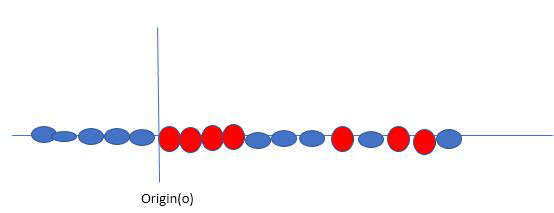

### 
our data is shown in the figure above. SVM solves this by creating a new variable using a kernel.

### important definitions
1. HARD MARGIN -> The maximum-margin hyperplane or the hard margin hyperplane is a hyperplane that properly separates the data points of different categories without any misclassifications
2. SOFT MARGIN -> : When the data is not perfectly separable or contains outliers, SVM permits a soft margin technique. Each data point has a slack variable introduced by the soft-margin SVM formulation, which softens the strict margin requirement and permits certain misclassifications or violations. It discovers a compromise between increasing the margin and reducing violations.
3. HING LOSS -> : A typical loss function in SVMs is hinge loss. It punishes incorrect classifications or margin violations. The objective function in SVM is frequently formed by combining it with the regularisation term.
4. *** important point -> here no of dimension of plane is the number of features in the data

### MATHMATICS BEHIND THE ALGORITHM

###
for more in depth understanding can refer to -> campusX yt channell there is a playlist of 7 videos of  same topic

### 
equation of a line mx + b in vector form ax+by+c = 0 we can generize the constants and variable by replacing a by w1 and b by w2 and variables x by x1 y by x2 and so on
so we can repsent the equation of plane in the below format 
so equation becomes w1x1+ w2x2+ w0 = 0
we can also assume in vector form w as 
[w1
w2
w3
.
.
.
]
and similarly 
x can be represented in vector form as 
[
x1
x2 
x3
x4
]
so the equation of plane in 2d 
w1x1 + w2x2 + w0 = 0
in 3d 
w1x1 + w2x2 + w3x3 + w0 = 0 
and so on in no of planes it keep on increasing in the same fashion

1. [important] we represent the vector in higher dimension by name of pi

by using the above vector representation of w and x 
we can reduce the equation of plane as wx + w0 = 0 where w = [w1,w2,w3,w4....] in column form and similary x = [x1,x2,x3,x4 ...] in column form since by default the vector are in column form
if we take tranpose of w then we take w.x then wx will become w1x1 + w2x2 + w3x3 ..... and hence the equation of the plane can be w^tx + w0 = 0 

w0 is the intercept which we assume to be zero since we can move vector up and down and also assuming our plane passes through the origin.
hence equation of plane will become 

--> (w^t)x = 0  can be written as w^t.x = 0  = > |w||x|cos theta = 0  this will be zero when the angle between w and x is 90degree. hence w is the the line perpendicular to the plane and x are the vector which lies on the plane.


In [3]:
#support vector machine

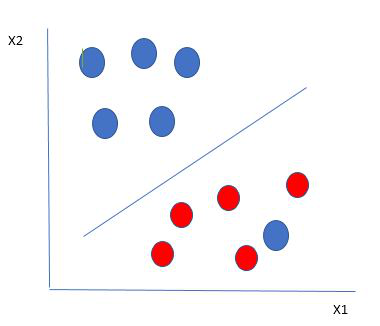

### 
the point closest to the plane are called SUPPORT VECTOR , we have to maximize the distance between  both the supoort vectors i.e one on the either side of the plane support vectors 


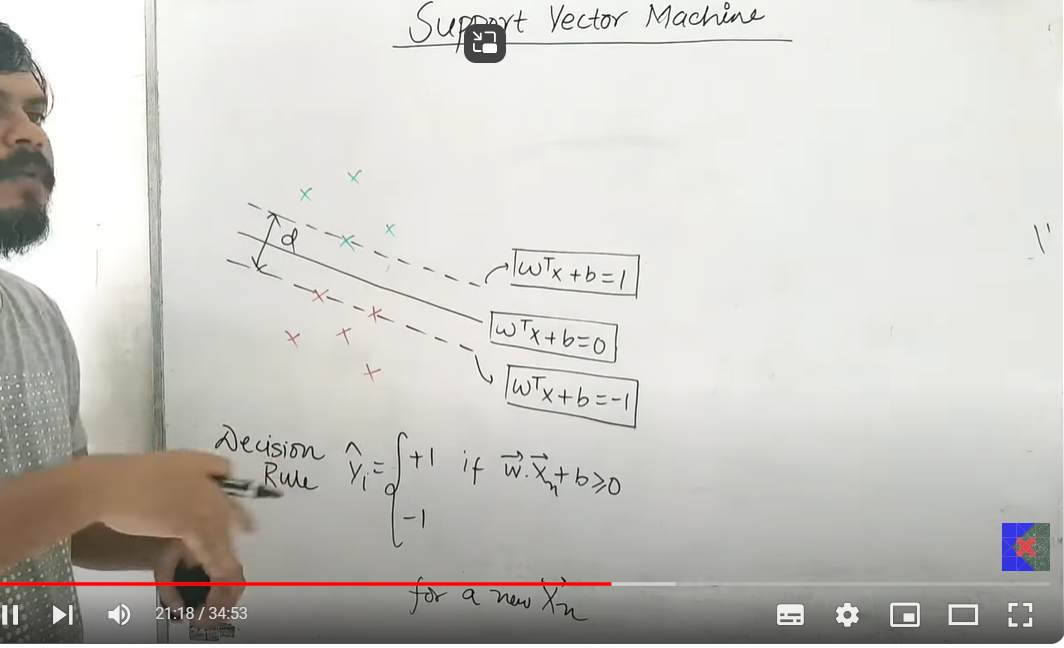

### in the above picture our idea will be to maximize the 'd' 

### 
we will repsent the margin vectors as 
wx + b = 1
wx  + b = -1
and the plane is we know wx + b = 0 
we assumed the values as such so the the both the vector margins are parallel and are at equal distance from the plane 

so the points which lie above the support vector plane will satisfy the equation -> wx +b >= 1 
and the points which are below support the plane will satisfy the equation -> wx + b <= -1 
since the points above and below the plane can be repsented by wx +b>0 and wx+b < 0 


let's convert both the equation of supoort vector to 1 equation 
let's suppose yi = 1 for all the points above wx+b >= 1 and yi = -1 for all the points below wx+b <=-1
hence we mutliply yi(wx+b >= 1) i.e 1(wx+b >= 1)  this will become wx + b >=1
and when we multiply yi assuming to be -1  yi(wx+b <= 1) i.e -1(wx+b <= -1)  this will become wx + b >=1
hence our equation will become yi(wx + b ) >= 1  , from this we can understand for support vectors yi(wx+ b) = 1

if we suppose a point as x1 on support vector upper and x2 a point on below support vector , shortest distance between both can be calculated as 
x2-x1 (w/|w|) where w is the perdicular to the plane and the (w/ |w| ) is the unit perpendicular vector .

if we try to simplify it using the equation of yi(wx+ b ) by the assumptions we will get d = 2/|w| 

### [important]
so now we have the eqations as 
d = 2/ |w| and constraint as for xi point yi(w^txi + b)  >= 1 i.e every point should be separable in case of hard margin i.e no intermixing of the data

### hard margin SVM
final equation for hard margin will become 
##### argmax 2/|w|  with constraint yi(w^txi + b) >=1
such problem is called constraint maximization problem
PROBLEM : 
    here the issue is it is assuming there won't be any outliers i.e which is not in case of real world problems hence it will fail in real world . so to overcome it we have to modify this equation and came up with sometihng called SOFT MARGIN SVM

### SOFT MARGIN SVM

### some general understaning maximizing f(x) = minimizing 1/f(x)
so argmax 2/|w| with constraint yi(w^txi + b) >=1 this equation will become argmin |w|/2  

### 
this |w|/2 is called margin error since we were trying to maximize the margin which  is 2/|w| there minimize the margin error i.e |w|/2

now since to deal with the intermixed data or the data points which passes the  positive negative support vector or + , - pi plains, we will add a term called classification error to the above equation which we will try to minize which is equal to  summation of zetai which lies from i = 0 to i =n .

also we will add a hyperparameter which can be tuned as per our demand to give more emphasis to margin error or classification error by the name of c  so the equation becomes in below image 

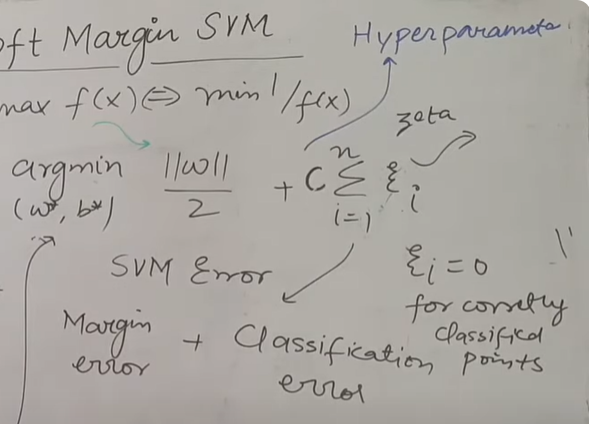

##### also margin error is called regularization and classification loss is called hinge loss

##### it is called soft margin because we are supposing that there can be error in classification and we are not being hard

### kernal trick

##### kernal is used for classification of data which cannot be classified linearly so we increase no of planes and see in higher dimensions to classify them 


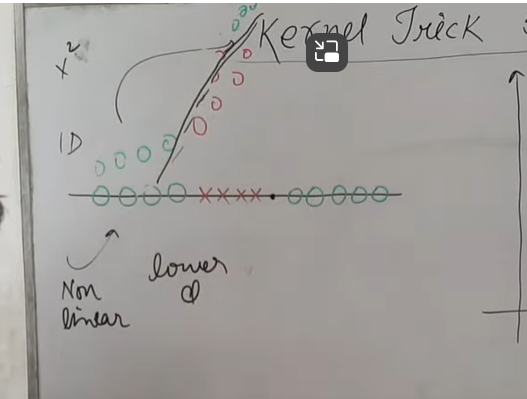

##### the functions that can convert this lower dimension data in higher dimension data are called KERNAL some eg. like RBF(radial basis function) e^-x2 and more like this , polynomial , sigmoid , linear
this above transformation is called kernal transformation

#### for code refer notebook Kernel Trick SVM

# 6. Decision Tree

##### decision treee is simply if else thing
like if it's sunny he will play tennis , if not might play indoor or sleep . using  these if else kind of thing trees are formed

in brief -> decision tree are nothing but giant structure of if-else conditions

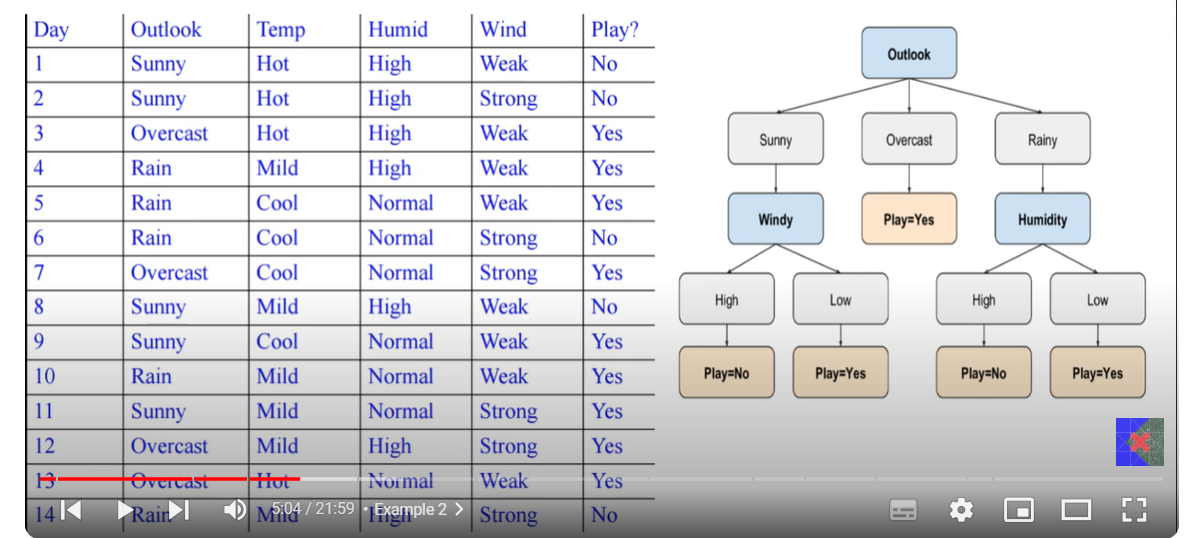

##### for numberical data see the below example 
and in the next picture below it , we have plotted all the points and try to draw the separation lines and that's how it classify 

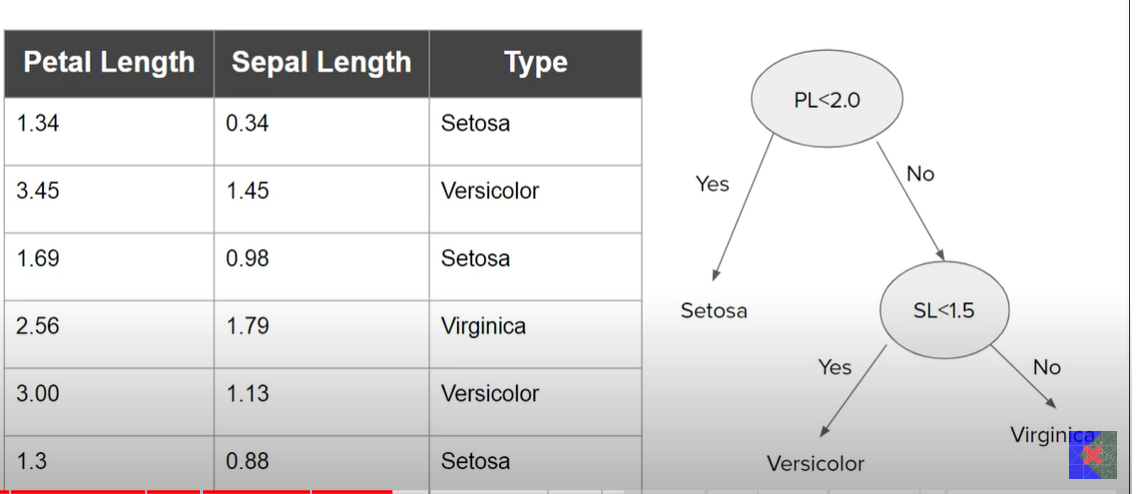

#### now we are drawing the points in the plane for above image and trying to draw the lines according to the conditions in the decision tree

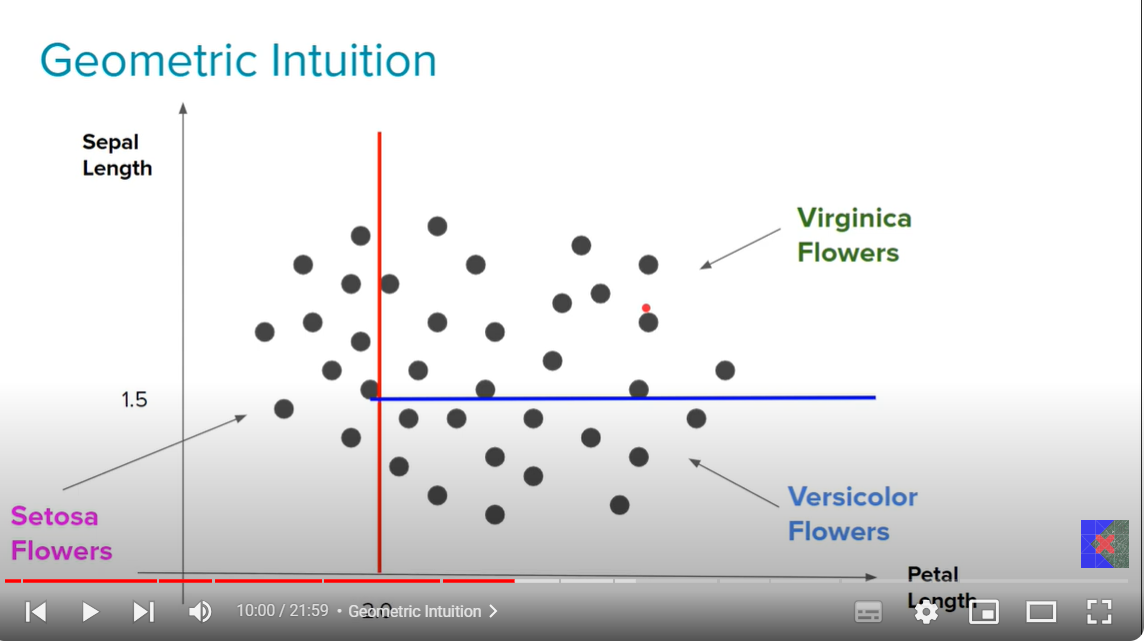

##### pseudo code to write or draw the decision tree
pseudo code
1. determine the best feature in the dataset to split the data on -> in decision tree this become the root node 

#### decision tree uses hyperplanes which run parallel to any one of the axes to cut your coordinate system into hypercuboids

### terminology of decision tree

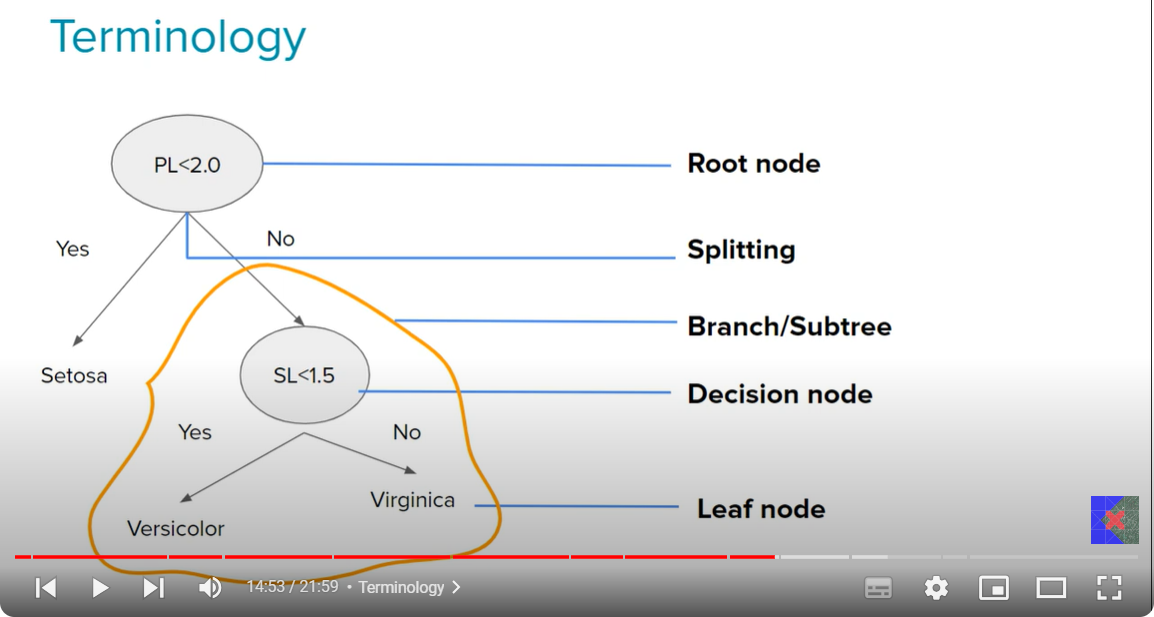

#### advantanges and disadvantages
advantages -> easy and intuitive, logrithmic inference timing , minimal data preparation
disadvantages -> overfitting, prone to error on imbalanced of datasets(skewed datasets)

#### the algorithm used for decision trees is called CART(classification and regression trees)

##### entropy-> the measure of disorder/uncertainity , or the measure of purity or impurity

##### formula for entropy in below image

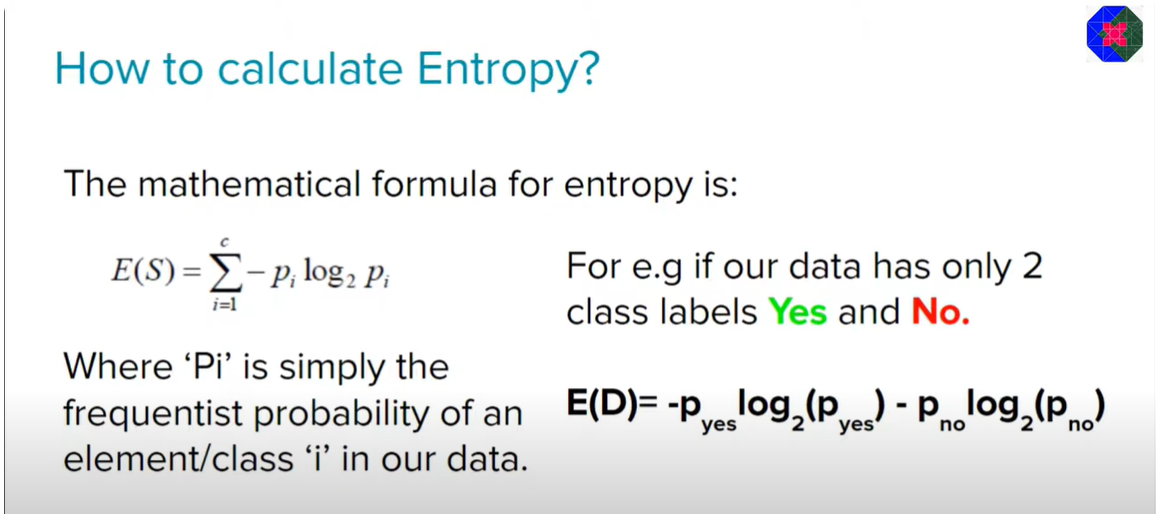

for example
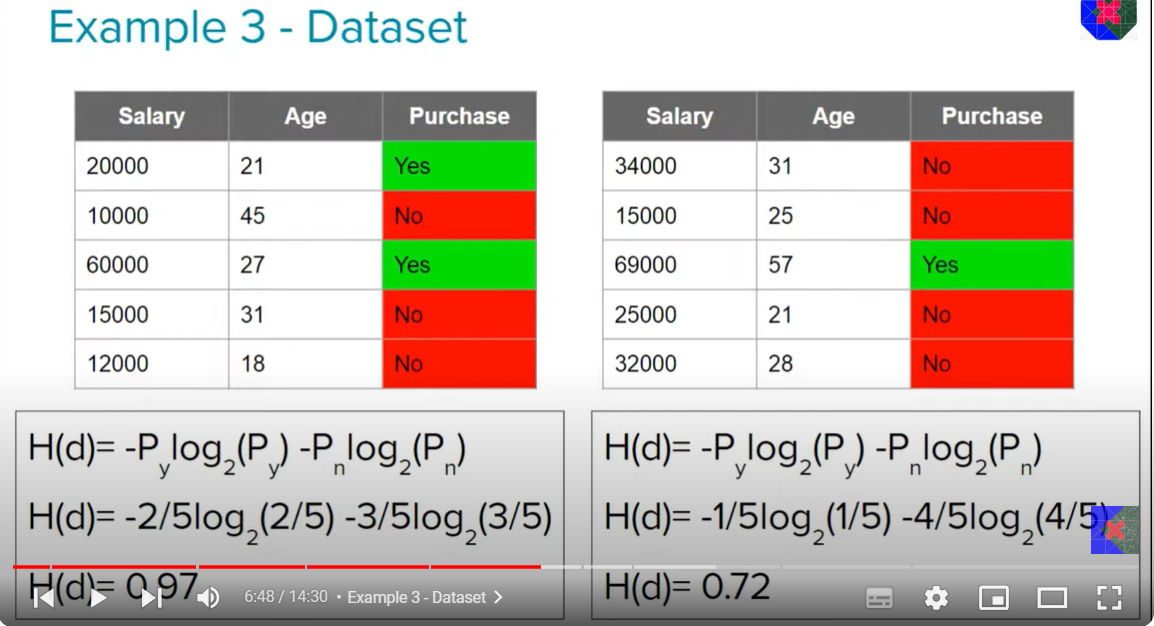

##### more the uncertainity i.e( the chances of getting error in a type of prediction) then more the entropy

#### in below image how we can see that when there is no certainity which is when probability is .5 then the entropy is maximum

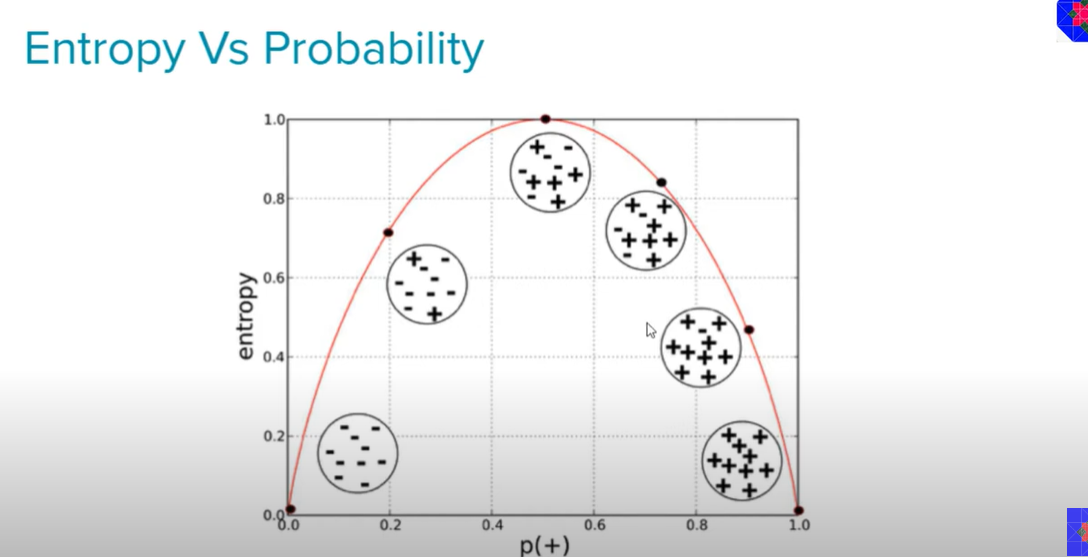

##### entropy of leaf node is 0 , INFORMATION GAIN -> Information gain of a parent node can be calculated as the entropy of the parent node subtracted entropy of the weighted average of the child node
1. We want to determine which attribute in a given 
set of training feature vectors is most useful for
discriminating between the classes to b 
learn
2. Information gain tells us how important a given 
attribute of the feature vectors is
3. We will use it to decide the ordering of attributes 
in the nodes of a decision tree.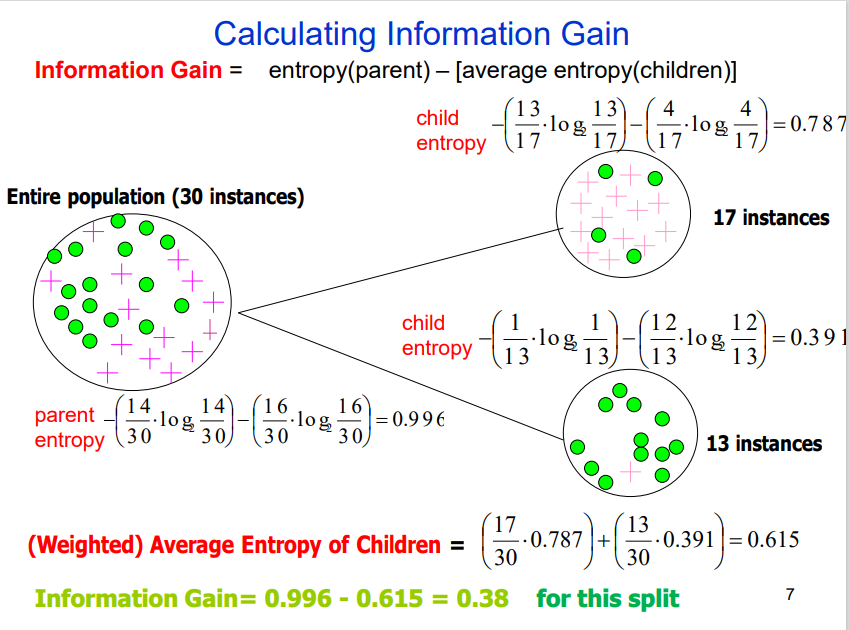
.ed.

#### GINI IMPURITY : it is calculation of impurity as entropy was used , so both can be used interchangebly
below is the iamge of calculation of impurity using gini
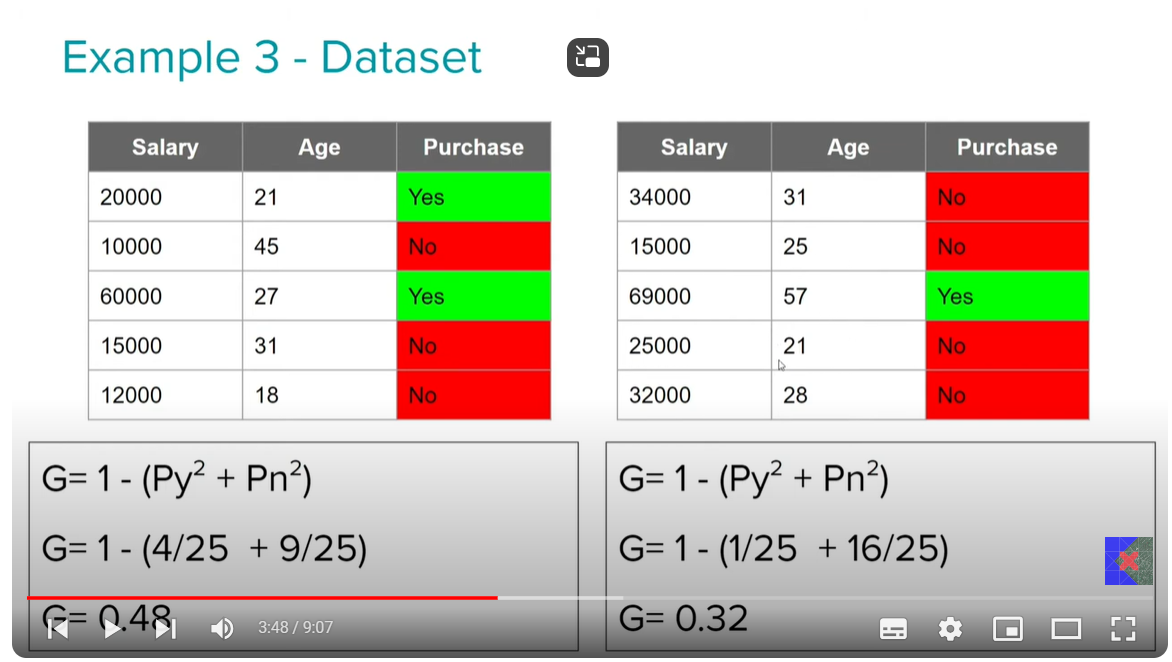

##### gini impurity has same graph with probability  as that of entrophy just the heighest height in this case is 0.5 whereas in entrophy was 1

##### we use gini impurity over entropy beacuase computationaly it is faster than entropy calculation hence better in case of larger datasets

### code 

In [74]:
from sklearn.datasets import load_iris

In [75]:
iris = load_iris()
X = iris.data
print(type(X))
#shape is a property
X.shape
X

<class 'numpy.ndarray'>


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [76]:
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [79]:
X_train.shape

(120, 4)

In [80]:
X_test.shape

(30, 4)

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
model = DecisionTreeClassifier()

In [83]:
model.fit(X_test,Y_test)

DecisionTreeClassifier()

In [84]:
model.score(X_test, Y_test)

1.0

In [85]:
model.predict(X_test[:10])

array([2, 2, 2, 2, 2, 0, 0, 1, 0, 2])

In [86]:
Y_test[:10]

array([2, 2, 2, 2, 2, 0, 0, 1, 0, 2])

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(Y_test,Y_test)

1.0

In [90]:
#visualizing the tree using the functions from sklearn.tre
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[2] <= 4.5\ngini = 0.647\nsamples = 30\nvalue = [10, 7, 13]'),
 Text(0.4, 0.5, 'x[3] <= 0.7\ngini = 0.484\nsamples = 17\nvalue = [10, 7, 0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13]'),
 Text(0.7, 0.6666666666666667, '  False')]

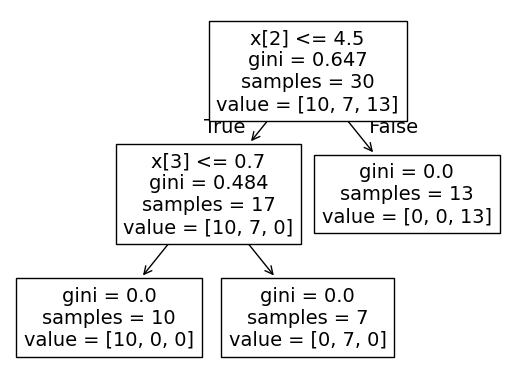

In [91]:
plot_tree(model)

##### above is a simple tree but if the tree is too big it is suggesting that the model might be overfitting and hence max_depth hyperparameter is used for removing the issue of overfitting

#### eg.


In [92]:
model1 = DecisionTreeClassifier(max_depth = 3)    #in above case only let's try to show this example although the above tree is not very much big to attain the stat of overfitting

In [93]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 43, 37]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.497\nsamples = 80\nvalue = [0, 43, 37]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.159\nsamples = 46\nvalue = [0, 42, 4]'),
 Text(0.125, 0.125, 'gini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.375, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

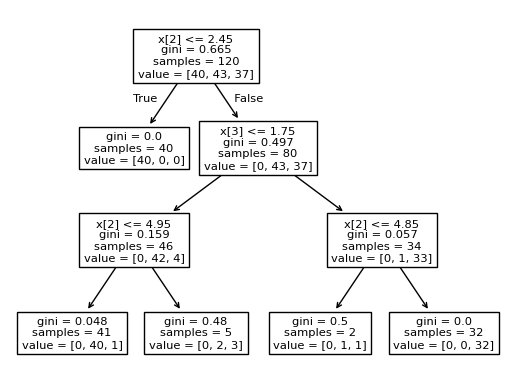

In [94]:
plot_tree(model1)  #we can confirm that the depth is only three at max 

### overfitting and underfitting of Decision Tree
below is a picture showing overfitting
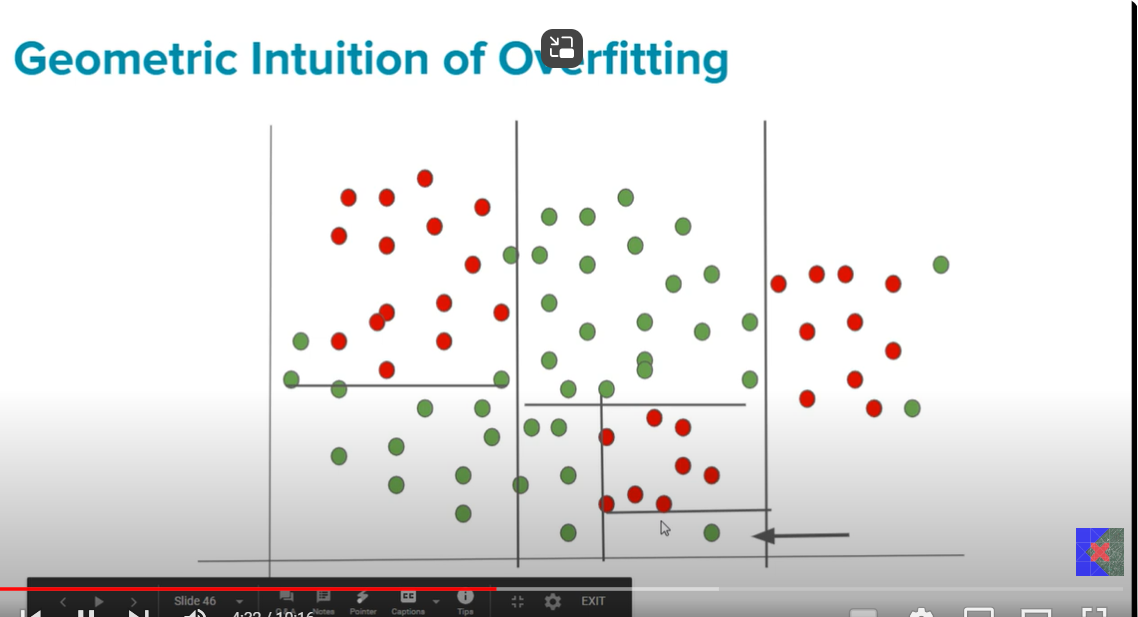


##### usually overfitting comes when max_depth = None by default value
##### underfitting comes when max_depth = 1 or to small or anything when the algorihtm is not able to separate
##### below is a image of underfitting

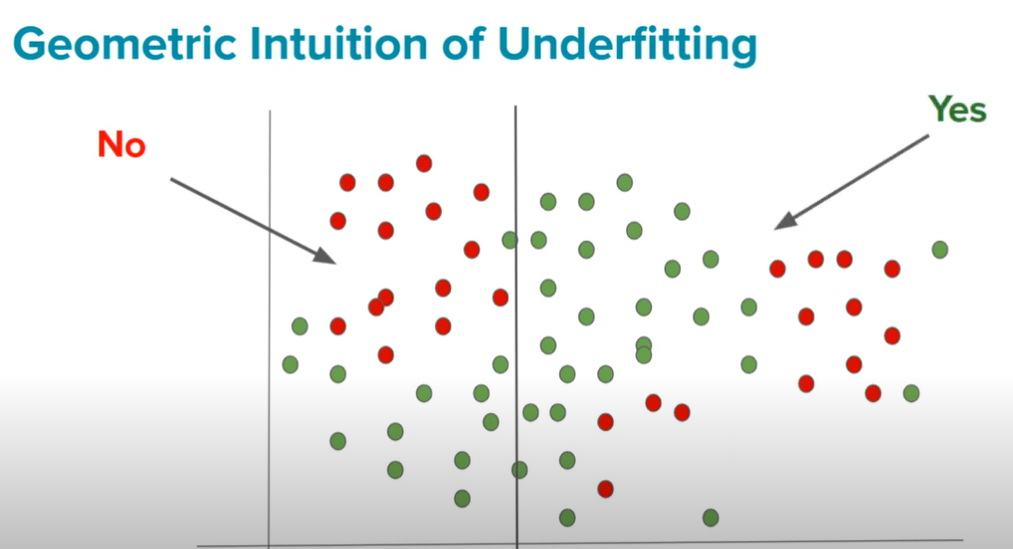

#### hyperparamaters of decision tree

###  DecisionTreeClassifier(hyperparametes...)  
1. criterion -> gini, and entropy   
2. splitter -> best/random -> we can do splitting randomly or using the infromation gain(best)
3. max_depth -> for removing the condition of overfitting and underfitting 
4. min_sample_split -> i.e we can split only if there are minimum this no of data points
5. min_sample_leaf -> similar to min_sample_split


In [ ]:
# note for getting the rows for training from a dataframe 
# x = df.iloc[:,:-1]   #here we are saying take all the rows and all columns except last
# y = df.iloc[:,-1]   #taking all the rows of last columns

#### Regression Tree using decision tree
for non-linear data regression tree is much better algorithm than linear regression algorithm

1. details
  we can see in the below image that if we use linear regression we will make lot of errors whereas if we use regression in this sample then it will draw more than one plane and can give better result



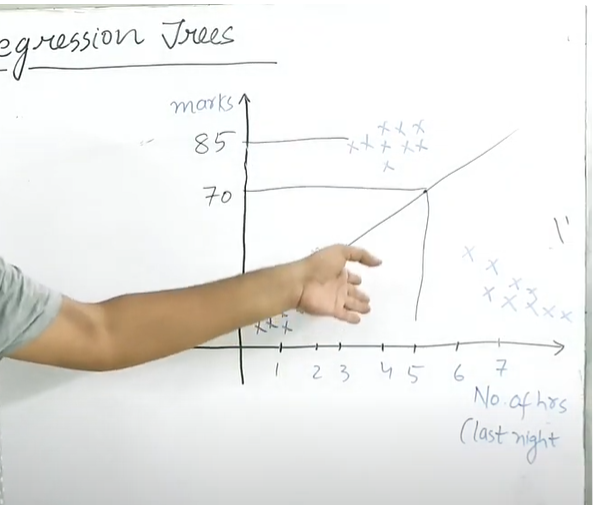

##### in regression tree we put imphasis on min_sample_split a lot, we keep a certain points in  group for further splitting else comes the condition of overfitting

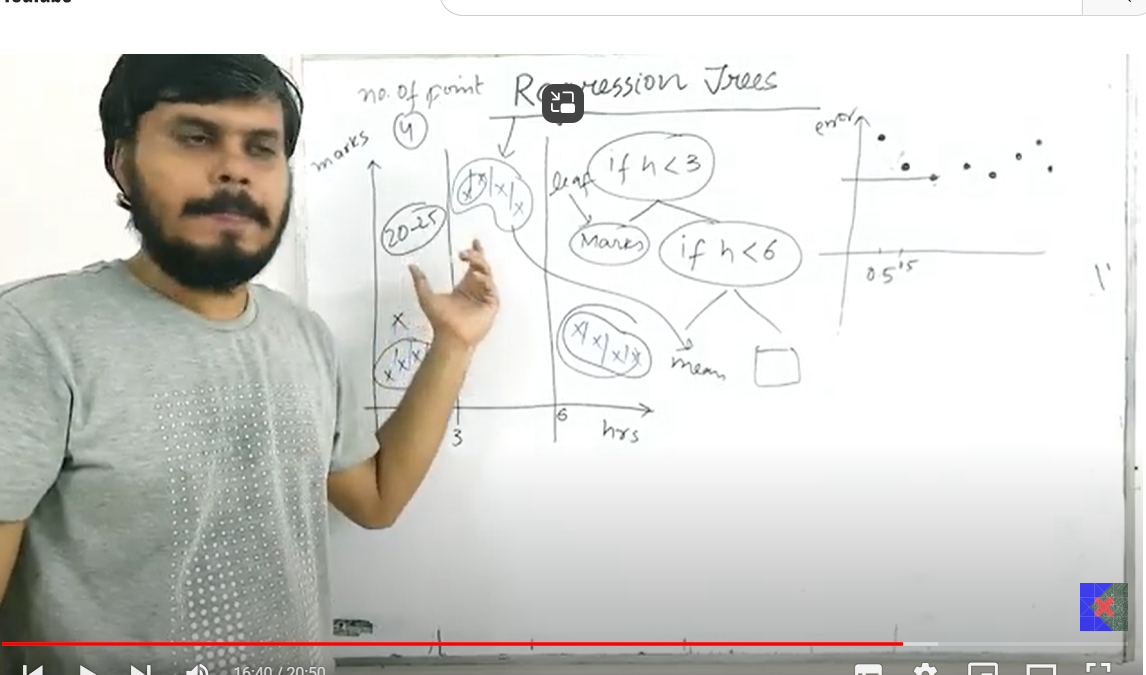

# 7. Random Forest

##### ensamble learning -> using the visdom of croud or in our context using a collection of models output to get the final output.
eg. we can use different types of models(eg. lr, svm, decision_tress) get the output.
or we can fix the model algorithm i.e use single type of model eg. lr and use different dataset to train them and hence will be trained of different data and hence have different perspective.
1. in case of classification type of problem we will use the majority result 
2. in regression type of model we use the mean of all the models output

#### techniques of ensamble learning
1. voting ensemble
2. bagging    -> here comes eg. random forest
3. boosting (most used) -> eg. adaboosting, gradient boosting,Xgboost
4. stacking
   

1. voting ensemble-> here different TYPES  of models are used and same dataset is provided to all the models types 
2. stacking -> different TYPES of models used and are trained on the same dataset . The output from the models is given to another model and that model will be trained on that input eg. KNN models and it will train on the output of the models. On the basis of this knn will assign weight to all the the above models. so we can say it is build on top of voting ensemble type of model
3. Bagging -> full form. bootstrap aggregation -> we take the same models and we provide different data to these models. Random forest comes here and it is ensemble of decision trees
4. Boosting -> same models are used , but instead of parallel output , here we give output of one model to another model as input . Telling where it made mistake and therefore where the coming model has to focus on and hence in this way we try to boost the output


#### advantages and disadvantges
##### advantages
1. improvement in performance
2. decreases the bias(toward the input data)
3. robustness (i.e with change in the data the model is able to give correct result)
4. always use ensemble


1. stacking diagram



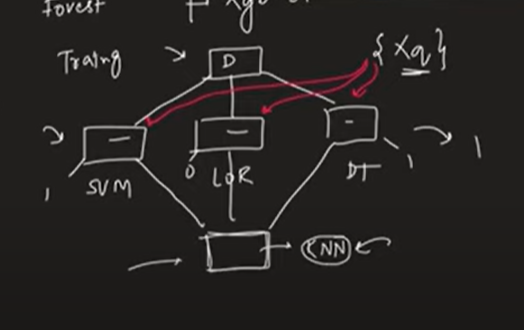

2. bagging



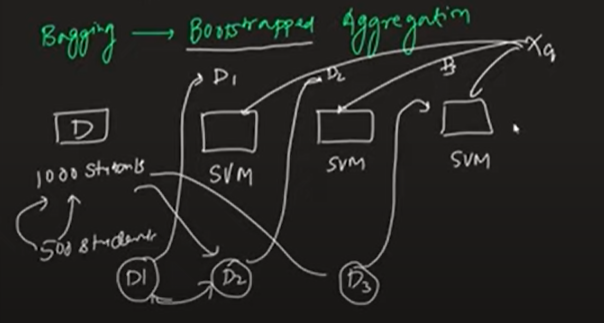

3. boosting


   
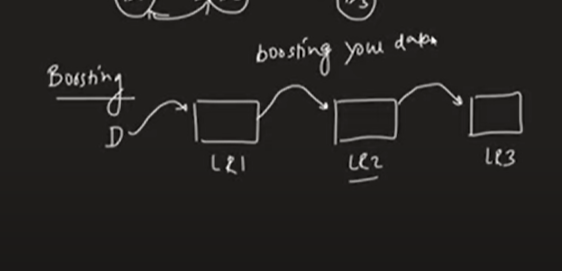

### random forest
random -> since it is a bagging based technique since random data out of dataset is used
forest -> collection of trees (decision trees)

we randomly select the data out of all the data we have 
suppose we have a dataset with 1000 rows .  we are using 5 decision tree to form a random forest . and let's suppose we randomly select 500 rows and call it D1 and feed it to DT1  and again select 500random rows and feed it to DT2 and so on . 
this taking of data is called SAMPLING

SAMPLING -> 
types of sampling ->
    1. row sampling
    2. column sampling
    3. combination
is of two type with replacement and without replacement 
i.e if we take 500 rows(row sampling) from the dataset and without replacement we try then when we select D2 , it will not contain any of the rows of D1

wherease in with replacement -> D2 may contain rows of D1

#### code

In [95]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree

In [96]:
X,Y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
Y

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [97]:
df = pd.DataFrame(X, columns=['col1','col2','col3','col4','col5'])
df['target'] = Y

In [98]:
df.head(), df.shape

(       col1      col2      col3      col4      col5  target
 0  1.108230 -0.034945 -2.280137 -1.346081 -1.537548       1
 1  2.098953 -2.115941 -0.184945  1.232974  0.494829       1
 2 -1.216595 -1.387400  0.710315  1.021181 -0.351364       0
 3 -1.219046 -1.011395  1.371391  0.890390 -2.164629       0
 4 -0.491275 -0.841534  1.094683  0.012889 -1.371458       0,
 (100, 6))

In [16]:
#row sampling 
def sample_rows(df,percent):
    #here we are just saying to return 0.1*100 i.e 10 rows 
    return df.sample(int(percent*df.shape[0]),replace=True)

In [21]:
df1 = sample_rows(df,0.1)
df1

col1      col2      col3      col4      col5  target
0   0.664290  1.618728 -2.156307  0.676896  1.483871       0
27  0.514393  0.222973 -1.060479 -0.152523  1.299889       0
98 -0.680180  1.177869 -2.158849  0.652026  1.934047       0
96  1.033260 -1.479495 -0.940415  1.220619  0.601072       1
57  1.048908  1.262809 -1.952641 -1.768384 -0.147551       0
17  0.227653 -1.222043 -0.274726  0.257371  1.986095       1
37  1.023351  0.265570 -3.114469 -0.130117 -0.646752       0
41 -1.325210 -1.163382  0.647521  1.517889  4.107469       1
2   1.345926 -1.412424 -1.411232  0.956880  0.022602       1
95  1.605832 -0.833035 -0.664793  1.484129  0.386010       1

In [20]:
df2 = sample_rows(df,0.1)

In [22]:
df3 = sample_rows(df,0.1)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
classifier1 = DecisionTreeClassifier()
classifier2 = DecisionTreeClassifier()
classifier3 = DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[1] <= -0.305\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

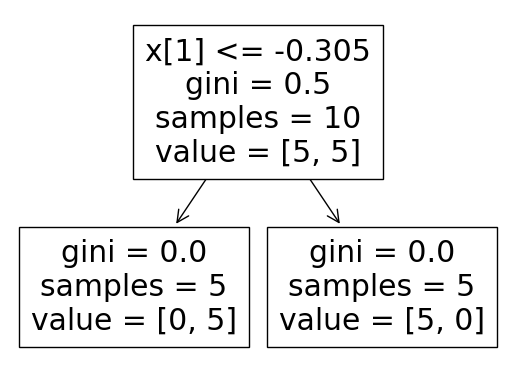

In [32]:
classifier1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
plot_tree(classifier1)

[Text(0.6, 0.875, 'x[0] <= 2.085\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.625, 'x[3] <= 0.807\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.375, 'x[1] <= -1.577\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

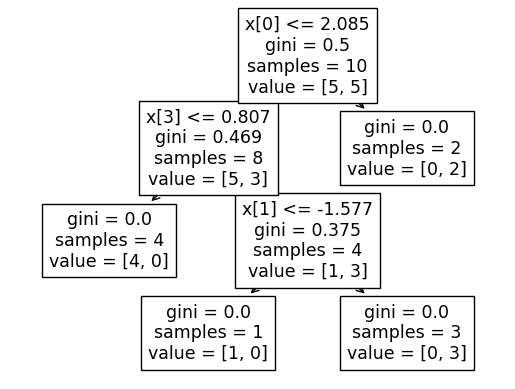

In [33]:
classifier2.fit(df2.iloc[:,0:5],df1.iloc[:,-1])
plot_tree(classifier2)

[Text(0.6666666666666666, 0.875, 'x[3] <= 1.659\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.5, 0.625, 'x[1] <= 0.112\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.3333333333333333, 0.375, 'x[4] <= 1.39\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

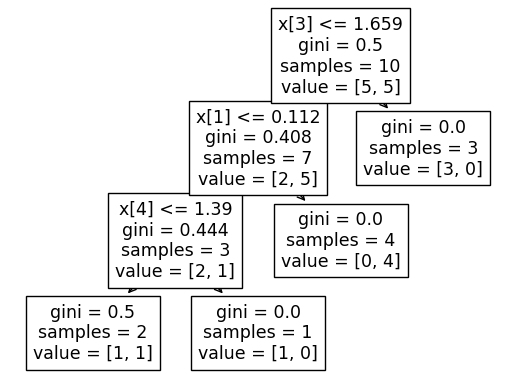

In [34]:
classifier3.fit(df3.iloc[:,0:5],df1.iloc[:,-1])
plot_tree(classifier3)

In [36]:
classifier1.predict(np.array([0.66429,1.618728,-2.156307,0.676896,1.483871]).reshape(1,5))

D:\myvenv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [37]:
classifier2.predict(np.array([0.66429,1.618728,-2.156307,0.676896,1.483871]).reshape(1,5))

D:\myvenv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [38]:
classifier3.predict(np.array([0.66429,1.618728,-2.156307,0.676896,1.483871]).reshape(1,5))

D:\myvenv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

##### out of three outputs we got majority i.e 2 true value as 0 and other one we got wrong

##### how random forest performs so well
1. bias -> when the model doesn't perform well on the training data itself
2. variance -> == overfitting

we always want low bias and low variance 
bias is inversly proportional to variance


#### there are two types of classifier in context to random forest in sklearn either we can use direct DecisionTree or Bagging. 

some differences between bagging and random forest
1. bagging is a general term and random forest is a special case of bagging type of ensemble method
2. there is difference in feature or column sampling, if we select row column from a 5 column dataset for each of decision tree of bagging then at all level those two column will be used for creating the nodes. whereas in case of randomforest at each node for divison two separate column will be picked and will be used for further division therefore there is extra randomness in this random forest 